In [89]:
import numpy as np
import pandas as pd 
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, TensorDataset

In [90]:
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'

In [91]:
train_data = pd.read_csv("./iris_train.data", names=['x1','x2','x3','x4','label'])
test_data = pd.read_csv("./iris_test.data", names=['x1','x2','x3','x4','label'])

train_data['label'] = pd.factorize(train_data.label)[0]
test_data['label'] = pd.factorize(test_data.label)[0]

print(train_data)
print(test_data)

     x1   x2   x3   x4  label
0   5.1  3.5  1.4  0.2      0
1   4.9  3.0  1.4  0.2      0
2   4.7  3.2  1.3  0.2      0
3   4.6  3.1  1.5  0.2      0
4   5.0  3.6  1.4  0.2      0
5   5.4  3.9  1.7  0.4      0
6   4.6  3.4  1.4  0.3      0
7   5.0  3.4  1.5  0.2      0
8   4.4  2.9  1.4  0.2      0
9   4.9  3.1  1.5  0.1      0
10  5.4  3.7  1.5  0.2      0
11  4.8  3.4  1.6  0.2      0
12  4.8  3.0  1.4  0.1      0
13  4.3  3.0  1.1  0.1      0
14  5.8  4.0  1.2  0.2      0
15  5.7  4.4  1.5  0.4      0
16  5.4  3.9  1.3  0.4      0
17  5.1  3.5  1.4  0.3      0
18  5.7  3.8  1.7  0.3      0
19  5.1  3.8  1.5  0.3      0
20  7.0  3.2  4.7  1.4      1
21  6.4  3.2  4.5  1.5      1
22  6.9  3.1  4.9  1.5      1
23  5.5  2.3  4.0  1.3      1
24  6.5  2.8  4.6  1.5      1
25  5.7  2.8  4.5  1.3      1
26  6.3  3.3  4.7  1.6      1
27  4.9  2.4  3.3  1.0      1
28  6.6  2.9  4.6  1.3      1
29  5.2  2.7  3.9  1.4      1
30  5.0  2.0  3.5  1.0      1
31  5.9  3.0  4.2  1.5      1
32  6.0  2

In [92]:
train_data = np.asarray(train_data)
test_data = np.asarray(test_data)

train_x = train_data[:,0:4]
print(train_x)
train_y = train_data[:,4]

test_x = test_data[:,0:4]
# print(test_x)
test_y = test_data[:,4]

print(test_y)

train_x = torch.tensor(train_x, dtype=torch.float).to(device)
train_y = torch.tensor(train_y, dtype=torch.long).to(device)
test_x = torch.tensor(test_x, dtype=torch.float).to(device)
test_y = torch.tensor(test_y, dtype=torch.long).to(device)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [5.5 2.3 4.  1.3]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [4.9 2.4 3.3 1. ]
 [6.6 2.9 4.6 1.3]
 [5.2 2.7 3.9 1.4]
 [5.  2.  3.5 1. ]
 [5.9 3.  4.2 1.5]
 [6.  2.2 4.  1. ]
 [6.1 2.9 4.7 1.4]
 [5.6 2.9 3.6 1.3]
 [6.7 3.1 4.4 1.4]
 [5.6 3.  4.5 1.5]
 [5.8 2.7 4.1 1. ]
 [6.2 2.2 4.5 1.5]
 [5.6 2.5 3.9 1.1]
 [6.3 3.3 6.  2.5]
 [5.8 2.7 5.1 1.9]
 [7.1 3.  5.9 2.1]
 [6.3 2.9 5.6 1.8]
 [6.5 3.  5.8 2.2]
 [7.6 3.  6.6 2.1]
 [4.9 2.5 4.5 1.7]
 [7.3 2.9 6.3 1.8]
 [6.7 2.5 5.8 1.8]
 [7.2 3.6 6.1 2.5]
 [6.5 3.2 5.1 2. ]
 [6.4 2.7 5.3 1.9]
 [6.8 3.  5.

In [93]:
batch_size = 8

train_ds = TensorDataset(train_x, train_y)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

test_ds = TensorDataset(test_x, test_y)
test_dl = DataLoader(test_ds, batch_size=batch_size)

In [94]:
class LogisticRegression(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(4,32),
            nn.ReLU(),
            nn.Linear(32,32),
            nn.ReLU(),
            nn.Linear(32,3),
        )

    def forward(self, input):
        input = self.linear(input)
        return input

In [95]:
lr_model = LogisticRegression().to(device)
print(lr_model)

loss_func = nn.CrossEntropyLoss()

lr = 1e-5

optimizer = optim.Adam(lr_model.parameters(), lr=lr)

LogisticRegression(
  (linear): Sequential(
    (0): Linear(in_features=4, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=3, bias=True)
  )
)


In [96]:
def accuracy(y_pred, y_true):
    y_pred = torch.argmax(y_pred, dim=1)
    acc = (y_pred == y_true).float().mean()
    return acc

In [97]:
train_acc = []
train_loss = []
test_acc = []
test_loss = []

for epoch in range(10000):
    for x, y in train_dl:
        y_pred = lr_model(x)
        loss = loss_func(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        epoch_acc = accuracy(lr_model(train_x), train_y)
        epoch_loss = loss_func(lr_model(train_x), train_y).data

        test_epoch_acc = accuracy(lr_model(test_x), test_y)
        test_epoch_loss = loss_func(lr_model(test_x), test_y).data

        print("epoch:%d"%epoch)
        print(f"loss:{epoch_loss.item():.3}, acc:{epoch_acc.item():.3}")
        print(f"test_loss:{test_epoch_loss.item():.3}, test_acc:{test_epoch_acc.item():.3}")
        print('-'*30)

        train_loss.append(epoch_loss.item())
        train_acc.append(epoch_acc.item())
        test_loss.append(test_epoch_loss.item())
        test_acc.append(test_epoch_acc.item())

epoch:0
loss:1.07, acc:0.322
test_loss:1.05, test_acc:0.375
------------------------------
epoch:1
loss:1.07, acc:0.322
test_loss:1.05, test_acc:0.375
------------------------------
epoch:2
loss:1.07, acc:0.322
test_loss:1.05, test_acc:0.375
------------------------------
epoch:3
loss:1.07, acc:0.322
test_loss:1.05, test_acc:0.375
------------------------------
epoch:4
loss:1.07, acc:0.322
test_loss:1.05, test_acc:0.375
------------------------------
epoch:5
loss:1.07, acc:0.322
test_loss:1.05, test_acc:0.375
------------------------------
epoch:6
loss:1.07, acc:0.322
test_loss:1.05, test_acc:0.375
------------------------------
epoch:7
loss:1.06, acc:0.322
test_loss:1.05, test_acc:0.375
------------------------------
epoch:8
loss:1.06, acc:0.322
test_loss:1.05, test_acc:0.375
------------------------------
epoch:9
loss:1.06, acc:0.322
test_loss:1.05, test_acc:0.375
------------------------------
epoch:10
loss:1.06, acc:0.322
test_loss:1.04, test_acc:0.375
-----------------------------

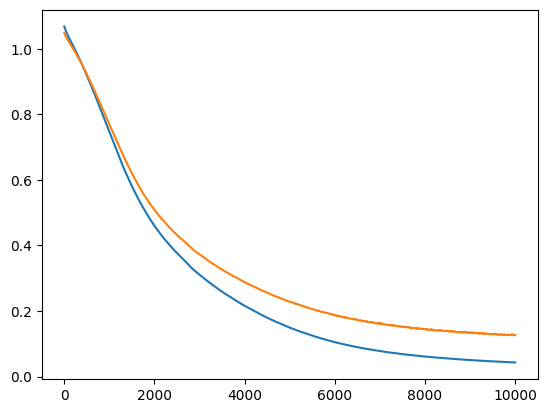

In [99]:
import matplotlib.pyplot as plt

plt.plot(range(epoch+1), train_loss, label='train_loss')
plt.plot(range(epoch+1), test_loss, label='test_loss')
plt.legend()

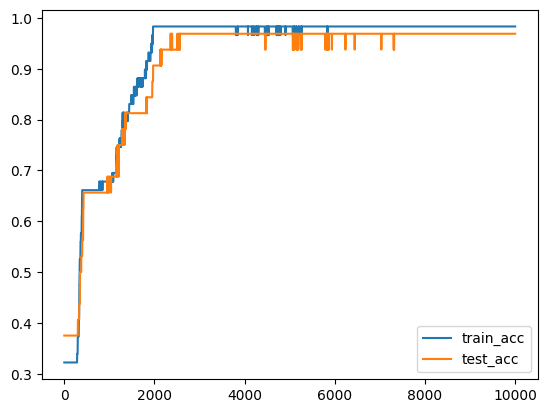

In [100]:
plt.plot(range(epoch+1), train_acc, label='train_acc')
plt.plot(range(epoch+1), test_acc, label='test_acc')
plt.legend()